# Homework 7: Unsupervised Learning

Aabir Abubaker Kar

## k-Means Clustering "By Hand"

You fielded an experiment and collected observations for 10 respondents across two features. The data are:

> `input_1 = c(5,8,7,8,3,4,2,3,4,5)`

> `input_2 = c(8,6,5,4,3,2,2,8,9,8)`

After inspecting your data, you suspect 3 clusters likely characterize these data, but you'd like to check your intuition. Perform k-means clustering "by hand" on these data, initializing at `k = 3`. Be sure to set the seed for reproducibility. Specifically:

1. (5 points) Imitate the k-means random initialization part of the algorithm by assigning each observation to a cluster at random.

2. (5 points) Compute the cluster centroid and update cluster assignments for each observation iteratively based on spatial similarity.

3. (5 points) Present a visual description of the final, converged (stopped) cluster assignments. 

4. (5 points) Now, repeat the process, but this time initialize at `k = 2` and present a final cluster assignment visually next to the previous search at `k = 3`.

5. (10 points) Did your initial hunch of 3 clusters pan out, or would other values of `k`, like 2, fit these data better? Why or why not? 


In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import seaborn as sns

import tabulate as tb

sns.set_style('whitegrid')

def plot_labels(x='', y='', t=''):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    
np.random.seed(42)

colors = dict(zip(range(8), ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']))

In [8]:
i1, i2 = [5,8,7,8,3,4,2,3,4,5], [8,6,5,4,3,2,2,8,9,8]

data = np.array([i1, i2]).T
print(data.shape)

(10, 2)


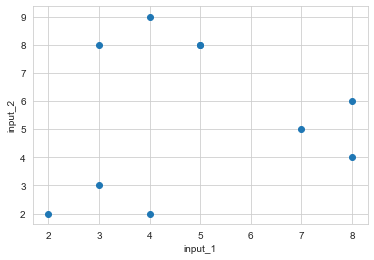

In [28]:
def plt_scatter_clusters(data, clusters=None, **kwargs):
    if clusters is not None and max(clusters)<8 and min(clusters)>=0:
        cols = [colors[i] for i in clusters]
        plt.scatter(data[:,0], data[:,1], c=cols)
    else:
        plt.scatter(data[:,0], data[:,1])
    plot_labels('input_1', 'input_2', kwargs.pop('t', ''))
    plt.show()

plt_scatter_clusters(data)

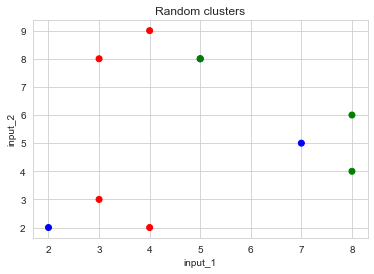

In [29]:
# Q1 - randomly assign clusters
clusters = np.random.randint(0, 3, size=data.shape[0])
plt_scatter_clusters(data, clusters, t='Random clusters')

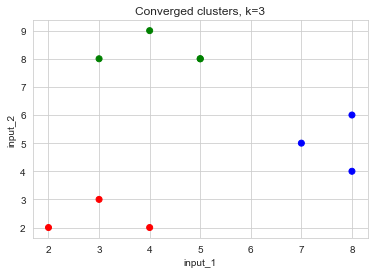

In [41]:
# Q2, Q3 - computer and plot converged clusters

def cluster_convergence(data, num_clusters=3):
    clusters = np.random.randint(0, num_clusters, size=data.shape[0])
    iter = 1
    while True or iter>1000:
        ctrds = []
        changes = 0
        for cluster in range(num_clusters):
            ctrd = np.mean(data[clusters==cluster], axis=0)
            ctrds.append(ctrd)
        for ind in range(data.shape[0]):
            ds = [np.linalg.norm(ctrds[cluster]-data[ind, :]
                                ) for cluster in range(num_clusters)]
            min_c = np.argmin(ds)
            if clusters[ind] != min_c:
                clusters[ind] = min_c
                changes+=1
        iter += 1
        if changes==0:
            break
    return clusters
        
clusters = cluster_convergence(data, 3)
plt_scatter_clusters(data, clusters, t='Converged clusters, k=3')

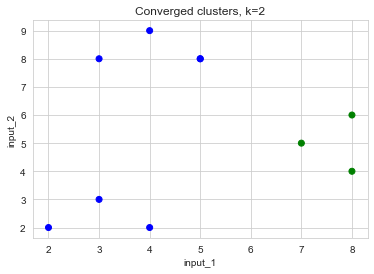

In [42]:
# Q4 - repeat for k=2
clusters = cluster_convergence(data, 2)
plt_scatter_clusters(data, clusters, t='Converged clusters, k=2')

**(10 points) Did your initial hunch of 3 clusters pan out, or would other values of k, like 2, fit these data better? Why or why not?**

## say something


## Application

`wiki.csv` contains a data set of survey responses from university faculty members related to their perceptions and practices of using Wikipedia as a teaching resource. Documentation for this dataset can be found at the UCI machine learning repository. The dataset has been pre-processed for you as follows:

  * Include only employees of UOC and remove `OTHER*`, `UNIVERSITY` variables
  * Impute missing values
  * Convert `domain` and `uoc_position` to dummy variables

In [47]:
df = pd.read_csv('./data/wiki.csv')
print(df.shape)
df.head()

(800, 57)


,age,gender,phd,yearsexp,userwiki,pu1,pu2,pu3,peu1,peu2,...,exp5,domain_Sciences,domain_Health.Sciences,domain_Engineering_Architecture,domain_Law_Politics,uoc_position_Associate,uoc_position_Assistant,uoc_position_Lecturer,uoc_position_Instructor,uoc_position_Adjunct
0,40,0,1,14,0,4,4,3,5,5,...,2,1,0,0,0,1,0,0,0,0
1,42,0,1,18,0,2,3,3,4,4,...,4,0,0,0,1,1,0,0,0,0
2,37,0,1,13,0,2,2,2,4,4,...,3,0,0,1,0,0,1,0,0,0
3,40,0,0,13,0,3,3,4,3,3,...,4,0,0,1,0,0,1,0,0,0
4,51,0,0,8,1,4,3,5,5,4,...,4,0,0,1,0,0,1,0,0,0


#### Dimension reduction

6. (15 points) Perform PCA on the dataset and plot the observations on the first and second principal components. Describe your results, e.g.,
    * What variables appear strongly correlated on the first principal component?
    * What about the second principal component?


In [52]:
data = df.to_numpy()
data = StandardScaler().fit(data).transform(data)
data.mean(axis=0).mean()

1.1783946138565259e-17

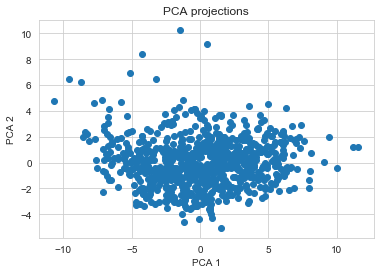

In [102]:
n_components = 5
pca = PCA(n_components=n_components)
data2 = pca.fit_transform(data)

plt.scatter(data2[:, 0], data2[:,1])
plot_labels('PCA 1', 'PCA 2', 'PCA projections')
plt.show()

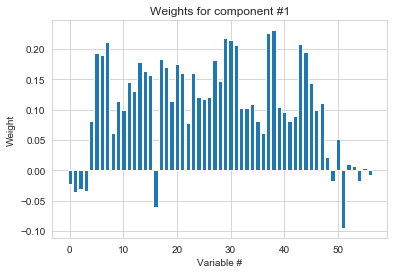

In [111]:
assert len(df.columns) == pca.components_.shape[-1], 'Dimension mismatch'
comp1 = pca.components_[0]
plt.bar(range(pca.components_.shape[-1]), comp1)
plot_labels('Variable #', 'Weight', 'Weights for component #1')
plt.show()

In [104]:
comp1 = pca.components_[0]
ords = np.argsort(comp1)[::-1][:7]
print(ords)

print('Based on the weights on component #1, this component is most \
strongly positively correlated with:')

print(tb.tabulate({'Column name':df.columns[ords], 'Component #':ords, 'Weight':comp1[ords]}
                  , headers='keys'))

[38 37 29 30  7 43 31]
Based on the weights on component #1, this component is most strongly positively correlated with:
Column name      Component #    Weight
-------------  -------------  --------
bi2                       38  0.230924
bi1                       37  0.226193
use3                      29  0.218809
use4                      30  0.214558
pu3                        7  0.210863
exp1                      43  0.208592
use5                      31  0.206539


## say something

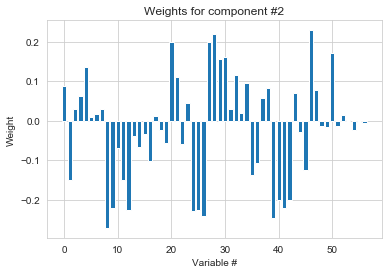

[46 28 27 20 50 30 29]
Based on the weights on component #1, this component is most strongly positively correlated with:
Column name                        Component #    Weight
-------------------------------  -------------  --------
exp4                                        46  0.228501
use2                                        28  0.21863
use1                                        27  0.197829
vis3                                        20  0.197633
domain_Engineering_Architecture             50  0.171478
use4                                        30  0.160865
use3                                        29  0.15515


In [112]:
comp2 = pca.components_[1]
plt.bar(range(pca.components_.shape[-1]), comp2)
plot_labels('Variable #', 'Weight', 'Weights for component #2')
plt.show()

ords = np.argsort(comp2)[::-1][:7]
print(ords)

print('Based on the weights on component #1, this component is most \
strongly positively correlated with:')

print(tb.tabulate({'Column name':df.columns[ords], 'Component #':ords, 'Weight':comp2[ords]}
                  , headers='keys'))

## say something

7. (5 points) Calculate the proportion of variance explained (PVE) _and_ the cumulative PVE for all the principal components. **Approximately how much of the variance is explained by the first two principal components?**

In [109]:
print(tb.tabulate({'Component #':list(range(1, 6)),
                   'explained variance': pca.explained_variance_,
                   'explained variance %':100*pca.explained_variance_/pca.explained_variance_.sum()},
                    headers='keys'))

  Component #    explained variance    explained variance %
-------------  --------------------  ----------------------
            1              13.0183                 54.2499
            2               3.63686                15.1555
            3               2.8671                 11.9477
            4               2.32442                 9.6863
            5               2.15028                 8.96062


55 % and 15 % of the variance is explained by the first two components respectively. This is more than two thirds of the total variance between these two components.

8. (10 points) Perform $t$-SNE on the dataset _and_ plot the observations on the first and second dimensions. Describe your results.

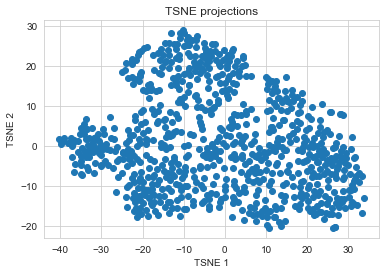

In [113]:
tmodel = TSNE(n_components=2)
tdata = tmodel.fit_transform(df)

plt.scatter(tdata[:,0], tdata[:,1])
plot_labels('TSNE 1', 'TSNE 2', 'TSNE projections')
plt.show()

## say something

#### Clustering

9. (15 points) Perform $k$-means clustering with $k = 2, 3, 4$. Be sure to scale each feature (i.e.,mean zero and standard deviation one). _Plot_ the observations on the first and second principal components from PCA and _color-code_ each observation based on their cluster membership. _Discuss_ your results.

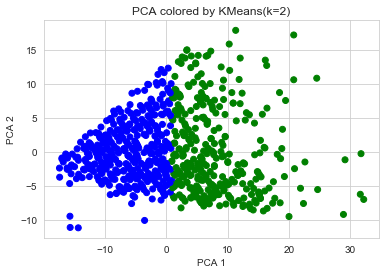

In [88]:
pca = PCA(n_components=5)
data2 = pca.fit_transform(df)

def q9(n=2):
    kmodel = KMeans(n_clusters=n)
    clusters = kmodel.fit_predict(df)
    colors = dict(zip(range(5), ['blue', 'green', plt.cm.Reds(0.8), 
                                 'orange', 'purple']))
    cols = [colors[i] for i in clusters]
    plt.scatter(data2[:, 0], data2[:,1], c=cols)
    plot_labels('PCA 1', 'PCA 2', f'PCA colored by KMeans(k={n})')
    plt.show()
    
q9(2)

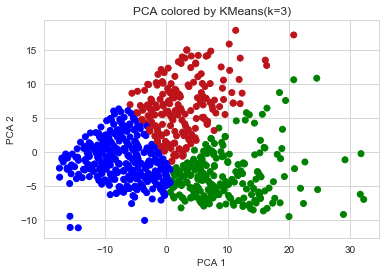

In [89]:
q9(3)

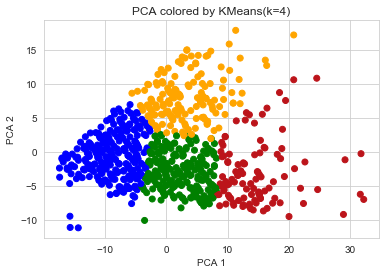

In [90]:
q9(4)

## Q9 discuss this BS 
## say something

10. (10 points) Use the elbow method, average silhouette, and/or gap statistic to identify the optimal number of clusters based on $k$-means clustering with scaled features.

In [114]:
best_n = 3
kmodel = KMeans(n_clusters=best_n)
best_k_clusters = kmodel.fit_predict(df)

11. (15 points) Visualize the results of the optimal $\hat{k}$-means clustering model. **First** use the first and second principal components from PCA, and color-code each observation based on their cluster membership. **Next** use the first and second dimensions from $t$-SNE, and color-code each observation based on their cluster membership. **Describe your results. How do your interpretations differ between PCA and $t$-SNE?**

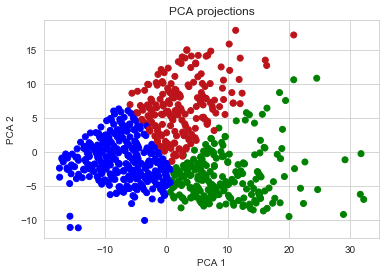

In [117]:
pmodel2 = PCA(n_components=2).fit_transform(df)

colors = dict(zip(range(5), ['blue', 'green', plt.cm.Reds(0.8), 
                             'orange', 'purple']))
cols = [colors[i] for i in best_k_clusters]

plt.scatter(pmodel2[:,0], pmodel2[:,1], c=cols)

plot_labels('PCA 1', 'PCA 2', 'PCA projections')
plt.show()

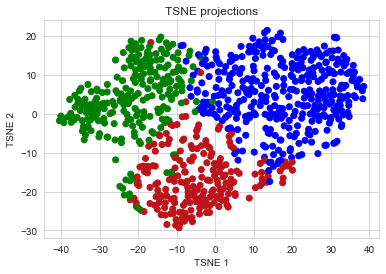

In [118]:
tmodel2 = TSNE(n_components=2).fit_transform(df)

colors = dict(zip(range(5), ['blue', 'green', plt.cm.Reds(0.8), 
                             'orange', 'purple']))
cols = [colors[i] for i in best_k_clusters]

plt.scatter(tmodel2[:,0], tmodel2[:,1], c=cols)

plot_labels('TSNE 1', 'TSNE 2', 'TSNE projections')
plt.show()